##  Análisis de Ventas

Este notebook recopila, limpia y analiza los datos entregados por un nuevo cliente: catálogo de productos, tiendas y ventas diarias de dos proveedores.

**Objetivo:** verificar si los datos cumplen con los requisitos para analizar el comportamiento de productos por tienda y fecha.


In [18]:
# 01. CARGA DE LIBRERÍAS NECESARIAS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configuración general de visualización
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12,6)

Los archivos **sellout-proveedor1.csv.gz** y **sellout-proveedor2.csv.gz** están comprimidos y separados por **|**

In [19]:
# CARGA DE LOS ARCHIVOS
clientes = pd.read_excel("maestro_clientes.xlsx")
productos = pd.read_csv("maestro_productos.csv")
ventas1 = pd.read_csv("sellout-proveedor1.csv.gz", compression='gzip', sep='|')
ventas2 = pd.read_csv("sellout-proveedor2.csv.gz", compression='gzip', sep='|')


Con elfin de identificar la estructura de cada archivo imprimimos los primeros registros de cada archivo

In [20]:
# 03. EXPLORACIÓN INICIAL
print("Clientes:")
display(clientes.head())
print("Productos:")
display(productos.head())
print("Ventas proveedor 1:")
display(ventas1.head())
print("Ventas proveedor 2:")
display(ventas2.head())


Clientes:


,Unnamed: 0,NUM TDA,NOMBRE DE TDA,CADENA,FORMATO,ESTADO,DIVISION
0,0,2,Bloody Sea Green BookShop,proveedor_1,Shop,Coalmar,SURESTE
1,1,4,Funny Sky Blue GipsyTrade,proveedor_1,Shop,Coalmar,SURESTE
2,2,5,Rare Green Laundrette,proveedor_1,Shop,Coalmar,SURESTE
3,3,6,Angry Indigo Center,proveedor_1,Shop,Coalmar,SURESTE
4,4,7,Tall Violet Deli,proveedor_1,Shop,Coalmar,SURESTE


Productos:


,Unnamed: 0,Sku,Sku_Description,Sku_Category,Sku_Subcategory
0,0,11058,Frosted Mango,Sugar-free,Cereal bars
1,1,29207,Nut Cheerios Mango,Super-flavour,Cereal box
2,2,38379,MultiGrain Mango,Sugar-free,Cereal bars
3,3,42671,Crunch Mango,Sugar-free,Cereal bars
4,4,54644,Corn Mango,Sugar-free,Cereal bars


Ventas proveedor 1:


,Sku,Date,Store_Id,Units,Price
0,4220015,2017-01-01 SO Diaria Piezas,18,6.0,15.6
1,4220015,2017-01-01 SO Diaria Piezas,24,0.0,0.0
2,4220015,2017-01-01 SO Diaria Piezas,39,0.0,0.0
3,4220015,2017-01-01 SO Diaria Piezas,44,0.0,0.0
4,4220015,2017-01-01 SO Diaria Piezas,46,0.0,0.0


Ventas proveedor 2:


,Sku,Date,Store_Id,Pieces,Price
0,4240039,2016/01/01,1000,23.0,$16.00
1,4240039,2016/01/01,1001,116.0,$16.00
2,4240039,2016/01/01,1002,146.0,$16.00
3,4240039,2016/01/01,1003,17.0,$16.80
4,4240039,2016/01/01,1004,5.0,$16.70


Con el fin de facilitar la manipulación de los datos procedemos a renombrar las columnas. Se unifica el nombre de **unidades** y **pieces** de las tablas **ventas 1** y **ventas 2** por **unidades**

In [21]:
# 3. Renombrar columnas
clientes.rename(columns={
    "NUM TDA": "id_tienda",
    "NOMBRE DE TDA": "nombre_tienda",
    "CADENA": "cadena",
    "FORMATO": "formato",
    "ESTADO": "estado",
    "DIVISION": "division"
}, inplace=True)

productos.rename(columns={
    "Sku": "id_producto",
    "Sku_Description": "nombre_producto",
    "Sku_Category": "categoria",
    "Sku_Subcategory": "subcategoria"
}, inplace=True)

ventas1.rename(columns={
    "Sku": "id_producto",
    "Date": "fecha",
    "Store_Id": "id_tienda",
    "Units": "unidades",
    "Price": "precio_unitario"
}, inplace=True)

ventas2.rename(columns={
    "Sku": "id_producto",
    "Date": "fecha",
    "Store_Id": "id_tienda",
    "Pieces": "unidades",
    "Price": "precio_unitario"
}, inplace=True)

Corregimos formatos de fecha y precio unitario

In [22]:
ventas1["fecha"] = pd.to_datetime(ventas1["fecha"], format="%Y-%m-%d", errors='coerce')


In [57]:
ventas2['precio_unitario'] = ventas2['precio_unitario'].replace(r'[\$,]', '', regex=True).astype(float)


Se unen las dos fuentes de ventas (ventas1 y ventas2) en un solo DataFrame: ventas.



In [48]:
# 4. Combinar ventas y limpieza básica
ventas = pd.concat([ventas1, ventas2], ignore_index=True)
ventas.dropna(subset=["id_producto", "id_tienda", "fecha", "unidades", "precio_unitario"], inplace=True)
ventas["unidades"] = ventas["unidades"].astype(int)
ventas['precio_unitario'] = ventas['precio_unitario'].astype(float)
ventas["ingresos"] = ventas["unidades"] * ventas["precio_unitario"]

In [49]:

# Aseguramos tipos correctos
ventas["fecha"] = pd.to_datetime(ventas["fecha"])
ventas = ventas.dropna(subset=["fecha"])
# Calculamos ingresos
ventas['ingresos'] = ventas['unidades'] * ventas['precio_unitario']

In [26]:
print(ventas)

         id_producto      fecha  id_tienda  unidades  precio_unitario  \
1206365      4240039 2016-01-01       1000        23            16.00   
1206366      4240039 2016-01-01       1001       116            16.00   
1206367      4240039 2016-01-01       1002       146            16.00   
1206368      4240039 2016-01-01       1003        17            16.80   
1206369      4240039 2016-01-01       1004         5            16.70   
...              ...        ...        ...       ...              ...   
6068389      4729193 2016-12-30       5827        14            17.90   
6068390      4729193 2016-12-30       5850         3            17.90   
6068391      4729193 2016-12-30       5851         3            16.00   
6068392      4729193 2016-12-30       5855        21            16.86   
6068393      4729193 2016-08-20       3766        12            13.60   

         ingresos  
1206365    368.00  
1206366   1856.00  
1206367   2336.00  
1206368    285.60  
1206369     83.50  
...

In [ ]:
# 5. Validaciones
print("🔍 Validaciones de integridad")
tiendas_catalogo = clientes["id_tienda"].nunique()
tiendas_ventas = ventas["id_tienda"].nunique()
print("Tiendas en catálogo:", tiendas_catalogo)
print("Tiendas con ventas:", tiendas_ventas)
fechas = ventas["fecha"].nunique()
dias_totales = (ventas["fecha"].max() - ventas["fecha"].min()).days + 1
print("Fechas únicas:", fechas)
print("Rango completo de días:", dias_totales)
print("¿Cobertura diaria completa?", fechas >= dias_totales * 0.95)


🔍 Validaciones de integridad
Tiendas en catálogo: 2448
Tiendas con ventas: 2085
Fechas únicas: 242
Rango completo de días: 365
¿Cobertura diaria completa? False


Identificar el numero de ventas por fecha

In [50]:
# Mostrar fechas únicas ordenadas
fechas_unicas = ventas["fecha"].dropna().sort_values().unique()
print(fechas_unicas)

# Agrupar por fecha y contar registros
ventas_por_fecha = ventas.groupby("fecha").size().reset_index(name="numero_ventas")

print(ventas_por_fecha)

<DatetimeArray>
['2016-01-01 00:00:00', '2016-01-02 00:00:00', '2016-01-03 00:00:00',
 '2016-01-04 00:00:00', '2016-01-05 00:00:00', '2016-01-06 00:00:00',
 '2016-01-07 00:00:00', '2016-01-08 00:00:00', '2016-01-09 00:00:00',
 '2016-01-10 00:00:00',
 ...
 '2016-12-21 00:00:00', '2016-12-22 00:00:00', '2016-12-23 00:00:00',
 '2016-12-24 00:00:00', '2016-12-25 00:00:00', '2016-12-26 00:00:00',
 '2016-12-27 00:00:00', '2016-12-28 00:00:00', '2016-12-29 00:00:00',
 '2016-12-30 00:00:00']
Length: 242, dtype: datetime64[ns]
         fecha  numero_ventas
0   2016-01-01          15472
1   2016-01-02          17809
2   2016-01-03          18374
3   2016-01-04          18423
4   2016-01-05          18476
..         ...            ...
237 2016-12-26          19243
238 2016-12-27          19406
239 2016-12-28          19504
240 2016-12-29          19708
241 2016-12-30          20931

[242 rows x 2 columns]


Graficamos el número de ventas por cada fecha única 

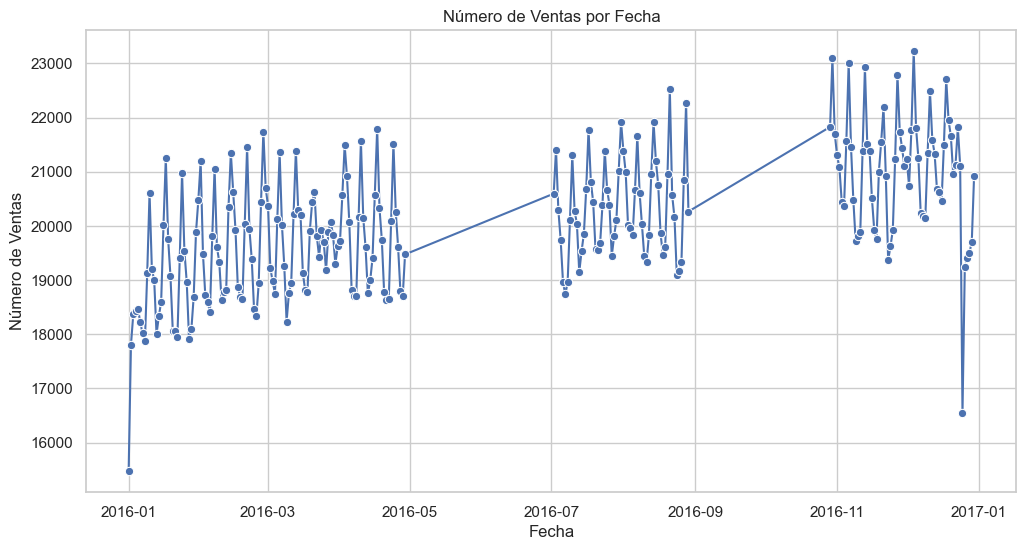

In [29]:

plt.figure(figsize=(12,6))
sns.lineplot(data=ventas_por_fecha, x="fecha", y="numero_ventas", marker="o")
plt.title("Número de Ventas por Fecha")
plt.xlabel("Fecha")
plt.ylabel("Número de Ventas")
plt.grid(True)
plt.show()


In [51]:
# Verificar cuántos productos hay en el catálogo
total_productos_catalogo = productos['id_producto'].nunique()

# Verificar cuántos productos aparecen en las ventas
total_productos_vendidos = ventas['id_producto'].nunique()

print(f"Productos en el catálogo: {total_productos_catalogo}")
print(f"Productos vendidos: {total_productos_vendidos}")

if total_productos_catalogo == total_productos_vendidos:
    print("✅ Todos los productos del catálogo tienen ventas.")
else:
    productos_faltantes = set(productos['id_producto']) - set(ventas['id_producto'])
    print(f"⚠️ Faltan ventas para {len(productos_faltantes)} productos del catálogo.")


Productos en el catálogo: 1242
Productos vendidos: 33
⚠️ Faltan ventas para 1209 productos del catálogo.


In [52]:
# Unir con clientes
ventas = ventas.merge(clientes, on="id_tienda", how="left")

# Unir con productos
ventas = ventas.merge(productos, on="id_producto", how="left")



Identificamos las unidades vendidas por cada división

In [56]:
unidades_por_division = (
    ventas.groupby("division")["unidades"]
    .sum()
    .reset_index()
    .sort_values(by="unidades", ascending=False)  # Orden descendente
)

print(unidades_por_division)


       division  unidades
4     METRO-SUR  22848068
3   METRO-NORTE  21931332
1        CENTRO  13875098
9       SURESTE   9497066
0         BAJÍO   6642436
2    CENTRO-SUR   5541171
8     PENÍNSULA   4881447
7     OCCIDENTE   3652712
5       NORESTE   3285483
10     SUROESTE   3201964
6      NOROESTE   1314421


Graficamos Las unidades vendidas por cada división

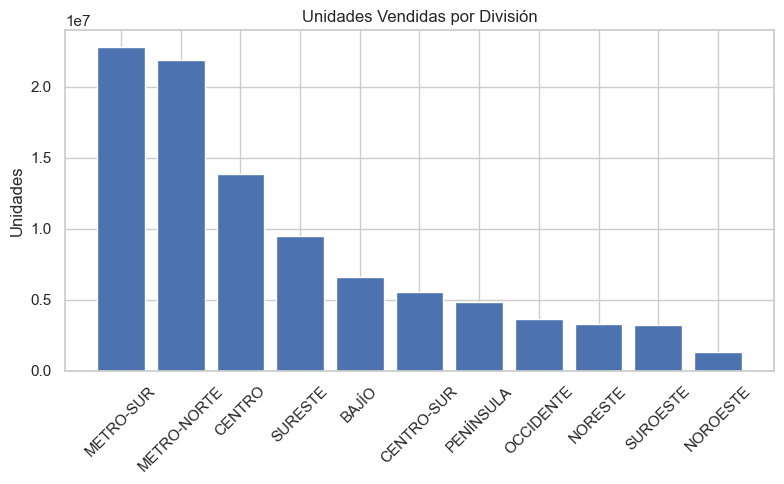

In [42]:

# Gráfico de unidades
plt.figure(figsize=(8, 5))
plt.bar(unidades_por_division["division"], unidades_por_division["unidades"])
plt.title("Unidades Vendidas por División")
plt.ylabel("Unidades")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
ventas["ingresos"] = ventas["unidades"] * ventas["precio_unitario"]
ingresos_por_division = (ventas.groupby("division")["ingresos"].sum().reset_index().sort_values(by="ingresos", ascending=False)  # Orden descendente
)
print(ingresos_por_division)

       division      ingresos
4     METRO-SUR  3.805072e+08
3   METRO-NORTE  3.631322e+08
1        CENTRO  2.151779e+08
9       SURESTE  1.296219e+08
0         BAJÍO  1.044205e+08
2    CENTRO-SUR  8.753942e+07
8     PENÍNSULA  6.797715e+07
7     OCCIDENTE  5.391213e+07
10     SUROESTE  4.758641e+07
5       NORESTE  4.512150e+07
6      NOROESTE  1.922345e+07


In [43]:
# División con más unidades vendidas
division_top_unidades = unidades_por_division.sort_values(by="unidades", ascending=False).head(1)

# División con más ingresos
division_top_ingresos = ingresos_por_division.sort_values(by="ingresos", ascending=False).head(1)
print(division_top_ingresos)

    division      ingresos
4  METRO-SUR  3.805072e+08
